In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import expit as sigmoid 
# scipy.special has a sigmoid function named expit

In [2]:
data = np.genfromtxt('ex2data2.txt',delimiter=',')
data.shape

(118, 3)

In [3]:
X = data[:,0:-1]
y = data[:,-1]
m = y.size
X.shape,y.shape,m

((118, 2), (118,), 118)

In [4]:
# Adding the intercept term to X
X = np.hstack((np.ones((m,1)),X))
X.shape

(118, 3)

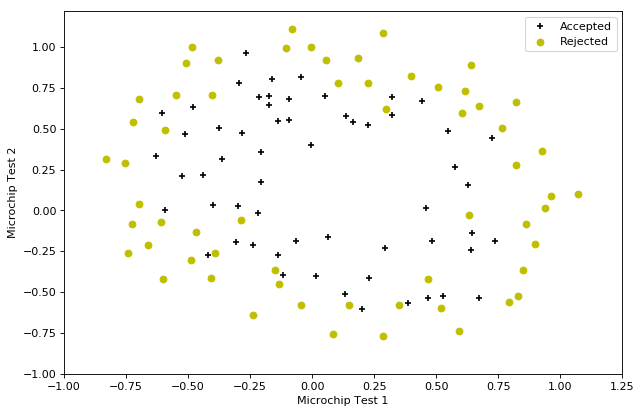

In [63]:
pos = np.nonzero(y==1)
neg = np.nonzero(y==0)
plt.figure(figsize=(9,6),dpi=80)
plt.scatter(X[pos,1],X[pos,2],c='k',marker='+',label = "Accepted")
plt.scatter(X[neg,1],X[neg,2],c='y',marker='o',label = "Rejected")
plt.xlim(xmin = -1,xmax = 1.25)
plt.ylim(ymin=-1)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(loc='upper right')
plt.show()

In [6]:
# Mapping the two input features to Polynomial Features
# The new feature matrix will comprise columns of features such as
# X1, X2, X1^2, X2^2, X1*X2, X1*X2^2 etc upto degree 6
degree = 6
X_new = X.copy()
for i in range(2,degree+1):
    for j in range(0,i+1):
        temp = X[:,1]**(i-j) * X[:,2]**j
        X_new = np.hstack((X_new,temp.reshape(-1,1)))
        
r,c = X_new.shape
r,c

(118, 28)

In [7]:
# Initializing Pararmeter Vector Theta to zeros
Theta = np.zeros(c)
Theta.shape

(28,)

In [8]:
# Setting the Regularization Parameter lambda to 1
lamb =1 

In [9]:
# Cost Function and Gradient for Regularized Logistic Regression
# Note : We do not regularize Theta[0] (bias term)
def costFunction(t,X,y,lamb):
    m = np.size(y)
    J =  (-1.0/m)*np.sum((y*np.log(sigmoid(X_new.dot(t))) + (1-y) * np.log(1-sigmoid(X_new.dot(t))))) + (
         (lamb/(2.0*m)) * sum(t[1:] **2 ))     # Exclude t[0] (bias term)
    grad = (1.0/m)*((X_new.T).dot(sigmoid(X_new.dot(t))-y))
    grad[1:] = grad[1:] + (float(lamb)/m)* t[1:]     # Exclude t[0] (bias term)              
    
    
    return J,grad  

In [10]:
# Computing Cost and Gradient with intitial Theta (zeros)
cost,G = costFunction(Theta,X,y,lamb)
print "Cost: ", cost
print "Gradient: "
print G[0:5]    # Displaying only first 5 values

Cost:  0.6931471805599454
Gradient: 
[8.47457627e-03 1.87880932e-02 7.77711864e-05 5.03446395e-02
 1.15013308e-02]


In [11]:
#Computing Cost and Gradient with all-ones Theta and lambda = 10
test_theta = np.ones(c)
cost,G = costFunction(test_theta,X,y,10)
print "Cost: ", cost
print "Gradient: "
print G[0:5]    # Displaying only first 5 values

Cost:  3.16450933161501
Gradient: 
[0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]


In [12]:
# Optimizing the parameters theta using scipy.optimize
res = minimize(costFunction,Theta,args=(X,y,lamb),method = 'Newton-CG',jac = True
               ,options={'disp':True})  

Optimization terminated successfully.
         Current function value: 0.529003
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 82
         Hessian evaluations: 0


In [13]:
# Displaying a few of the optimized parameters
theta_1 = res.x
theta_1[0:5,np.newaxis] 

array([[ 1.27274087],
       [ 0.62527111],
       [ 1.18108958],
       [-2.01996152],
       [-0.91742387]])

In [14]:
# Computing the accuracy of the classifier on the Training Set
# probabilities >= 0.5 are considered 1 and the rest 0
p = (X_new.dot(theta_1) >= 0)
accuracy = np.mean(p == y)*100
print "Accuracy on the Training Set %s %%" % accuracy

Accuracy on the Training Set 83.05084745762711 %


In [43]:
# Setting the Regularization Parameter lambda to 0 to showcase Overfitting
lamb =0
res = minimize(costFunction,Theta,args=(X,y,lamb),method = 'BFGS',jac = True
               ,options={'disp':True})  
theta_0 = res.x

Optimization terminated successfully.
         Current function value: 0.224569
         Iterations: 546
         Function evaluations: 547
         Gradient evaluations: 547


In [44]:
p = (X_new.dot(theta_0) >= 0)
accuracy = np.mean(p == y)*100
print "Accuracy on the Training Set %s %%" % accuracy

Accuracy on the Training Set 91.52542372881356 %


In [50]:
# Setting the Regularization Parameter lambda to 100 to showcase Underfitting

lamb =100
res = minimize(costFunction,Theta,args=(X,y,lamb),method = 'Newton-CG',jac = True
               ,options={'disp':True})  
theta_100 = res.x

Optimization terminated successfully.
         Current function value: 0.686484
         Iterations: 3
         Function evaluations: 4
         Gradient evaluations: 18
         Hessian evaluations: 0


In [51]:
p = (X_new.dot(theta_100) >= 0)
accuracy = np.mean(p == y)*100
print "Accuracy on the Training Set %s %%" % accuracy

Accuracy on the Training Set 61.016949152542374 %
